In [3]:
import pandas as pd
import numpy as np

house = pd.read_csv("/Users/josemontoro/data/personal/springboard/Capstone/house_prices/house-prices-advanced-regression-techniques/train.csv")


# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [4]:
# For the rows that have true missing values (MCAR), in Electrical, BsmtFinType2, BsmtExposure, we'll input the most common values

house.at[1379,'Electrical'] = 'SBrkr'
house.at[332, 'BsmtFinType2'] = 'Unf'
house.loc[948, 'BsmtExposure'] = 'Av'


In [5]:
## Converting the identified missing values as necessary

# Converting numerical missing values to 0
filled = house.copy(deep=True)
filled[['LotFrontage', 'MasVnrArea']] = filled[['LotFrontage', 'MasVnrArea']].fillna(value=0)


In [6]:
# Converting the text missing values to 'None'

cols = ['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'GarageCond',
'GarageType',
'GarageQual',
'GarageFinish',
'GarageYrBlt',
'MasVnrType',
'BsmtExposure',
'BsmtFinType2',
'BsmtCond',
'BsmtQual',
'BsmtFinType1'
]

filled[cols] = filled[cols].fillna(value='None')


In [7]:
## Data Visualization starts here
viz = filled.copy()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
viz.shape
# How many observations and variables do we have?

(1460, 81)

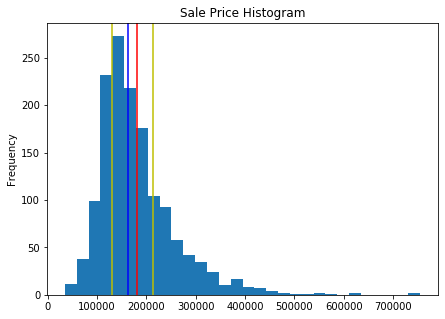

In [78]:
viz['SalePrice'].plot(kind='hist', bins=30, title='Sale Price Histogram', figsize=[7,5])
plt.axvline(viz.SalePrice.mean(), color='r', label='Mean')
plt.axvline(viz.SalePrice.median(), color='b', label='Median')
plt.axvline(viz.SalePrice.quantile(.25), color='y', label='25% Quantile')
plt.axvline(viz.SalePrice.quantile(.75), color='y', label='75% Quantile')
# Distribution of Sale Price

In [52]:
# Min and max of SalePrice
print("The cheapest house costs ${} and the most expensive one costs ${}".format(viz.SalePrice.min(), viz.SalePrice.max()))

The cheapest house costs $34900 and the most expensive one costs $755000


In [53]:
viz.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

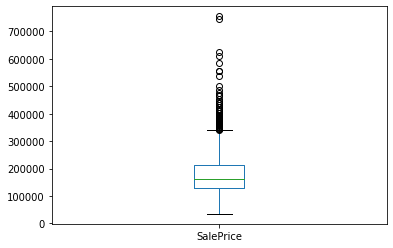

In [79]:
viz.SalePrice.plot(kind="box")

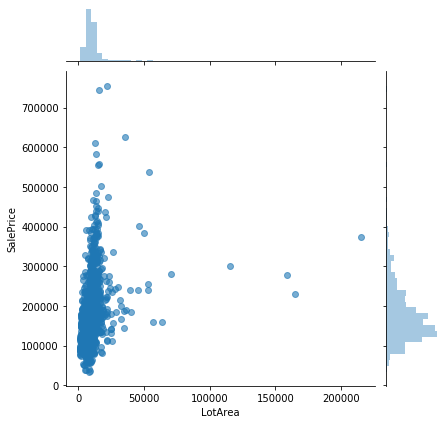

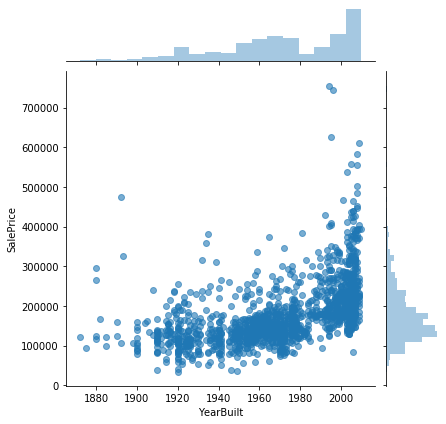

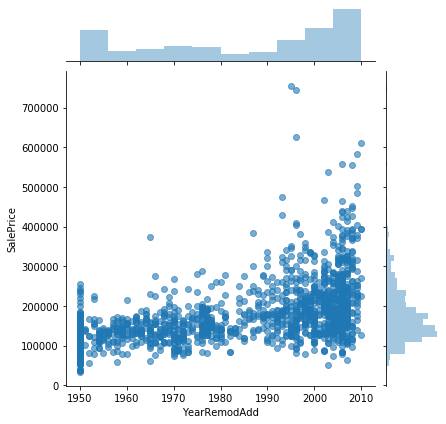

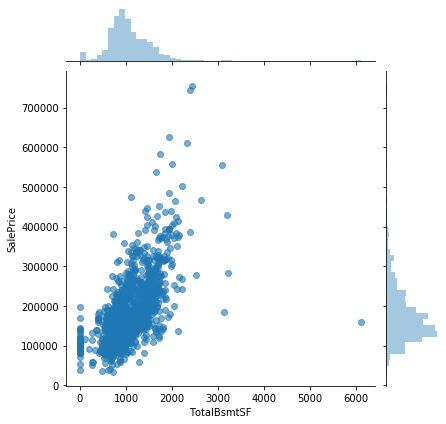

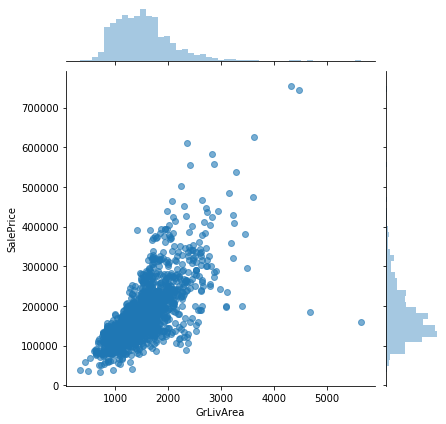

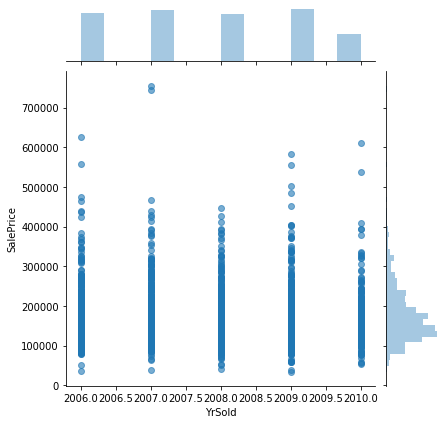

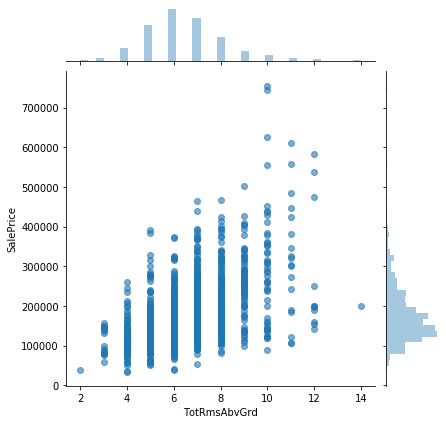

In [9]:
# Scatter plots
cols = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'YrSold', 'TotRmsAbvGrd']
for col in cols:
    sns.jointplot(data=viz, x=col,y='SalePrice', alpha=0.6)
    plt.show()


### Scatter Plots

_Testing the relationship between two numerical variables_

There seem to be correlations between 'SalePrice' and the following variables:
- YearBuilt
- TotalBasementSF
- GeneralLivingArea
- TotalRoomsAboveGround

Surprisingly, there's not a strong correlation with LotArea or YearRemodeled

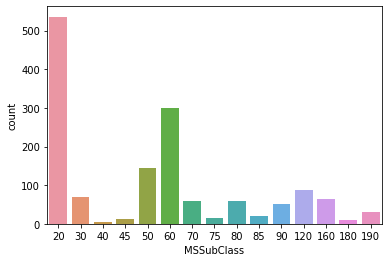

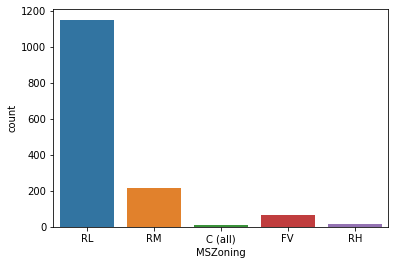

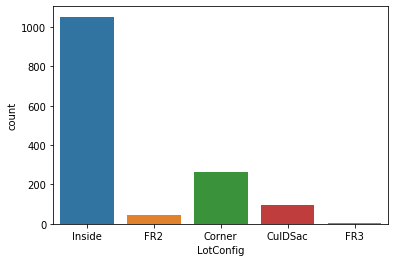

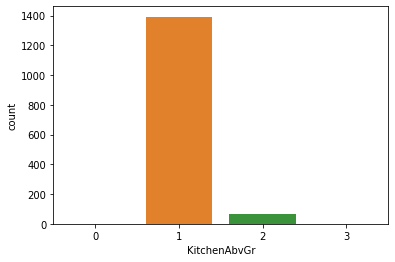

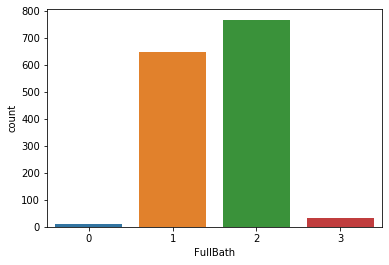

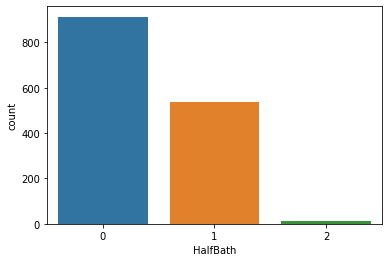

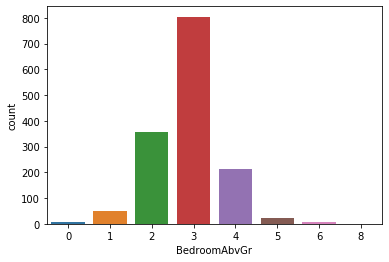

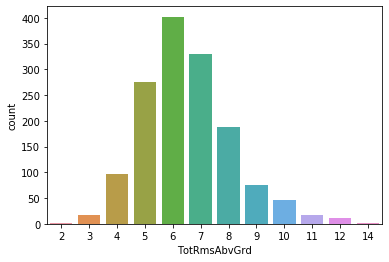

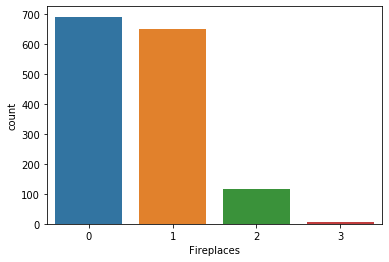

In [27]:
# Count plots
cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'KitchenAbvGr', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
for col in cols:
    ax = sns.countplot(data=viz, x=col)
    plt.show()
    

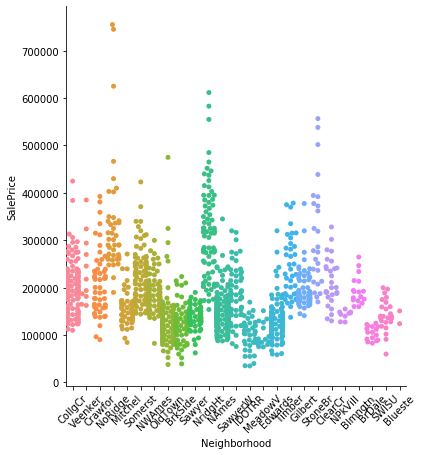

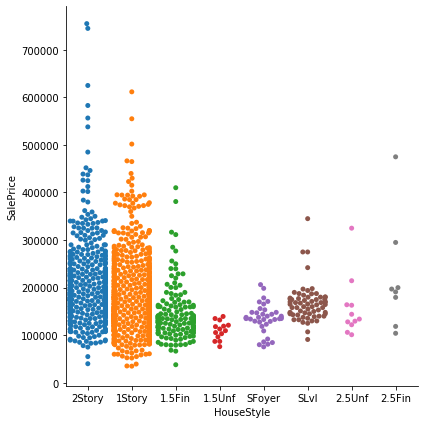

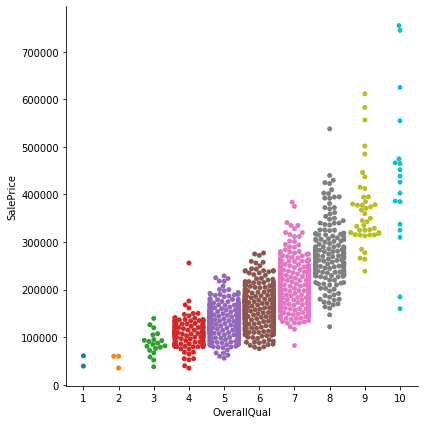

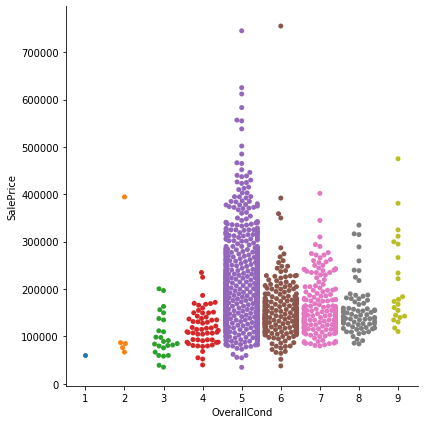

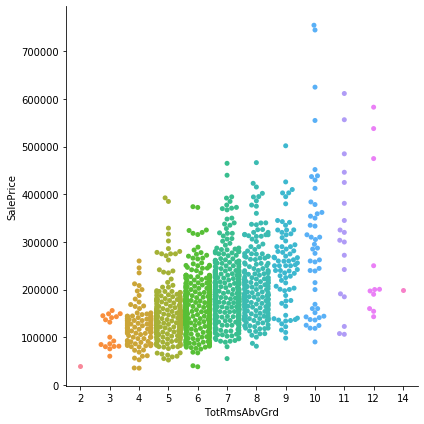

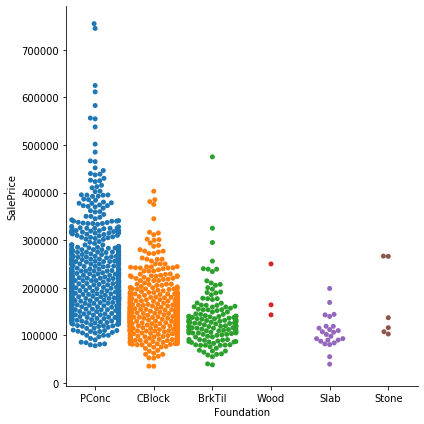

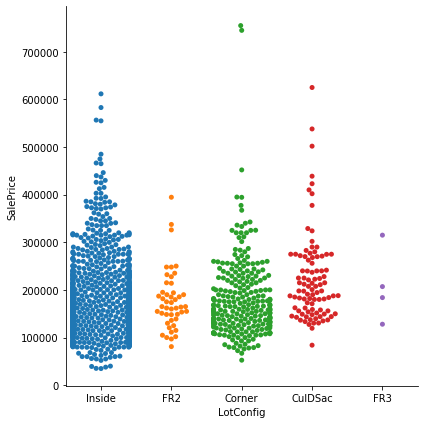

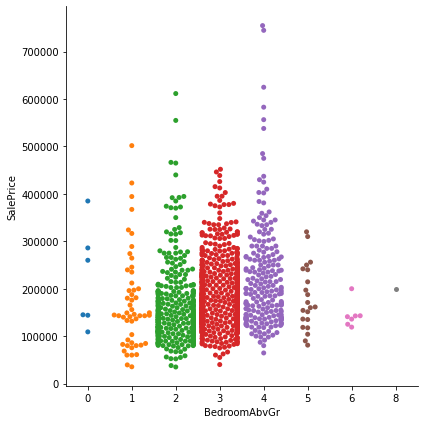

In [98]:
cols = ['Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'Foundation', 'LotConfig', 'BedroomAbvGr']

for col in cols:
    g = sns.catplot(kind="swarm", x=col, y="SalePrice", data=viz, height=6, aspect=1)
    if col == 'Neighborhood':
        g.set_xticklabels(rotation=45)
    else:
        pass
    plt.show()

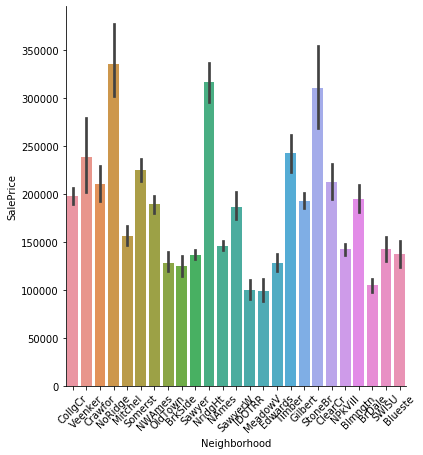

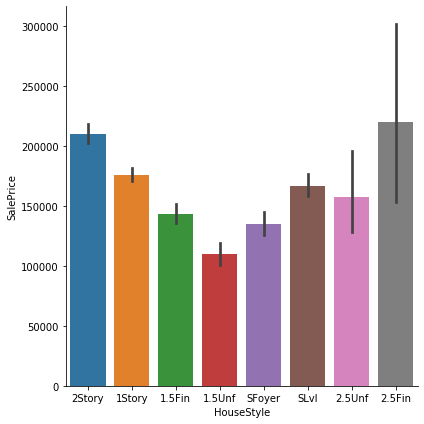

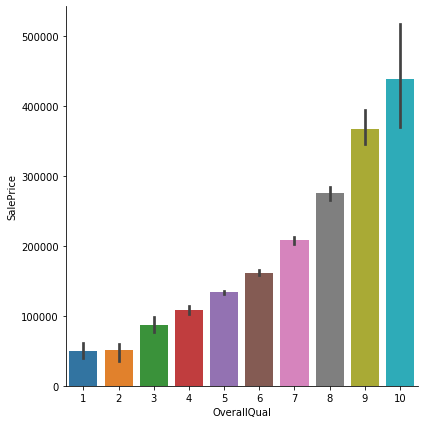

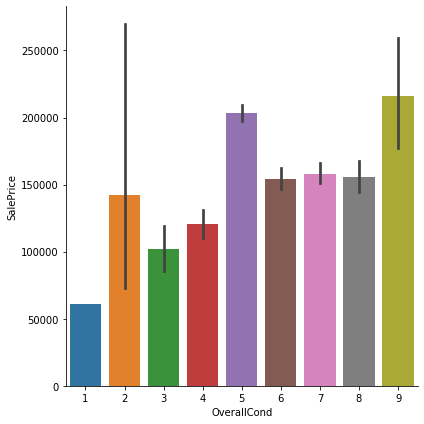

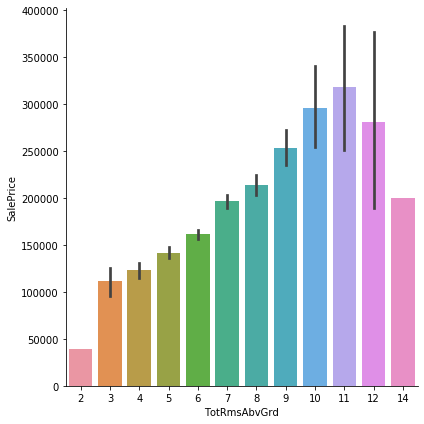

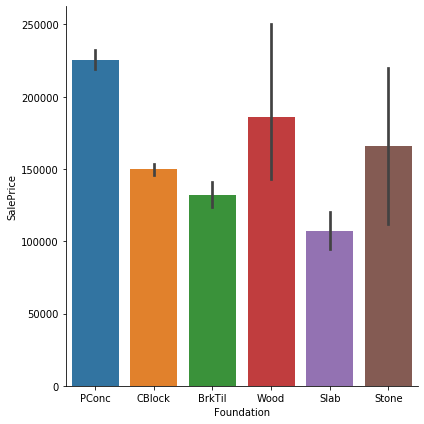

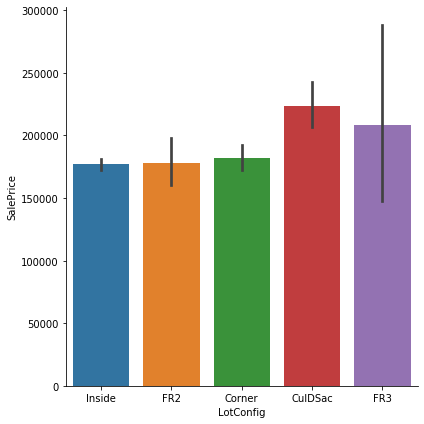

In [89]:
# Bar plots
cols = ['Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'Foundation', 'LotConfig']

for col in cols:
    g = sns.catplot(x=col, y="SalePrice", kind="bar", data=viz, height=6, aspect=1)
    if col == 'Neighborhood':
        g.set_xticklabels(rotation=45)
    else:
        pass
    plt.show()

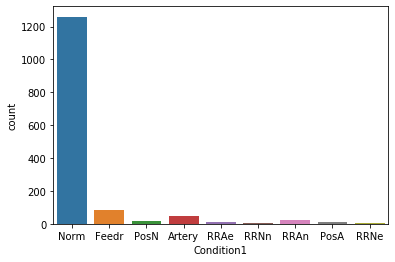

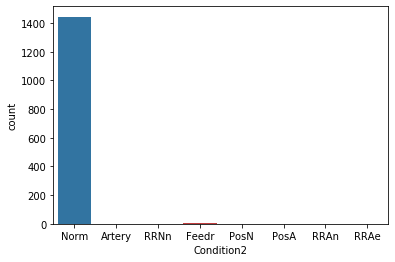

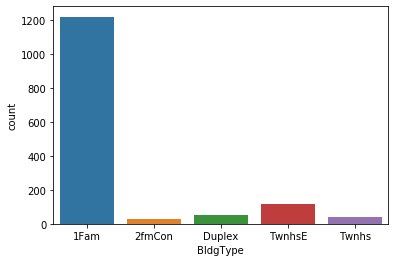

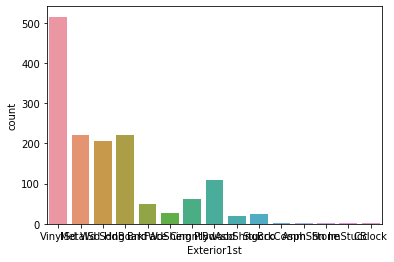

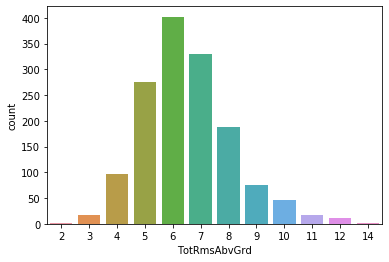

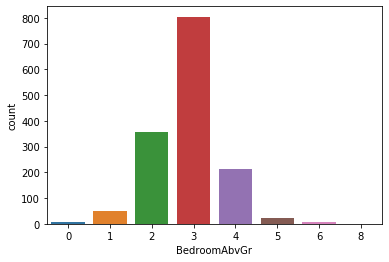

In [92]:
# Count plots
cols = ['Condition1', 'Condition2', 'BldgType', 'Exterior1st', 'TotRmsAbvGrd', 'BedroomAbvGr']
for col in cols:
    ax = sns.countplot(data=viz, x=col)
    plt.show()

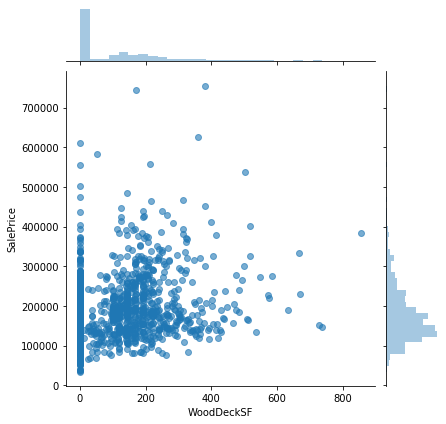

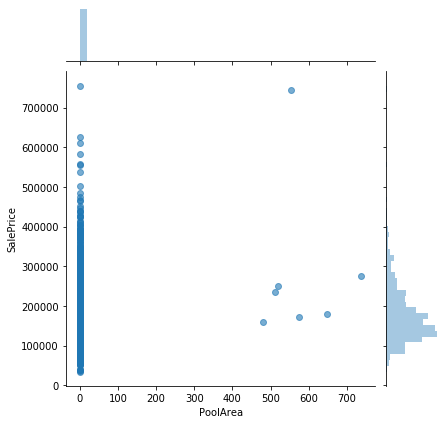

In [30]:
# How to better display this?
# Scatter plots
cols = ['WoodDeckSF', 'PoolArea']
for col in cols:
    sns.jointplot(data=viz, x=col,y='SalePrice', alpha=0.6)
    plt.show()

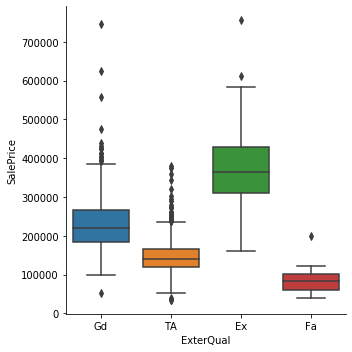

In [31]:
# Box plots
cols = ['ExterQual']
for col in cols:
    g = sns.catplot(data=viz, x=col, y='SalePrice', kind='box')
    if col == 'Neighborhood':
        g.set_xticklabels(rotation=45)
        plt.figure(figsize=(10, 12))
    else:
        pass
    plt.show()

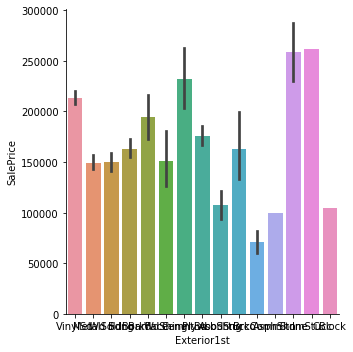

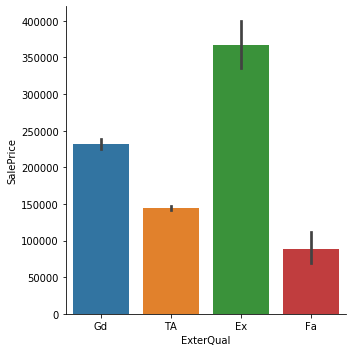

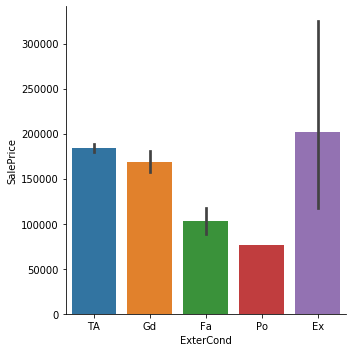

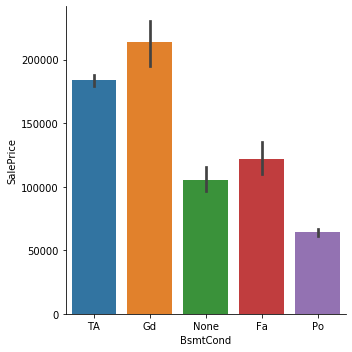

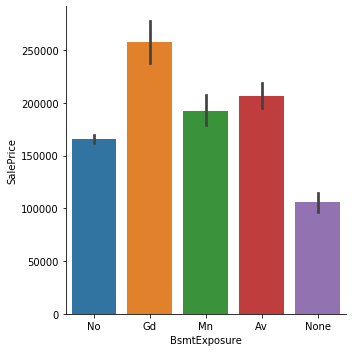

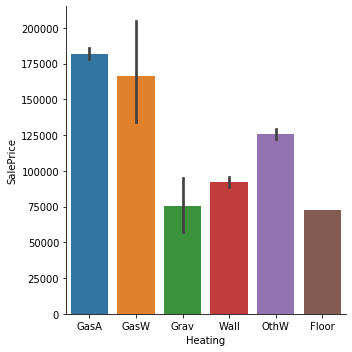

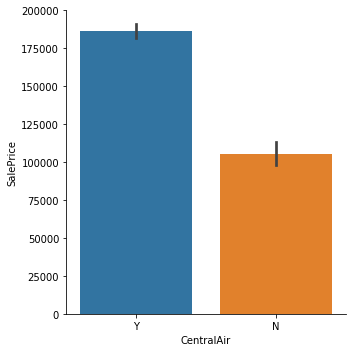

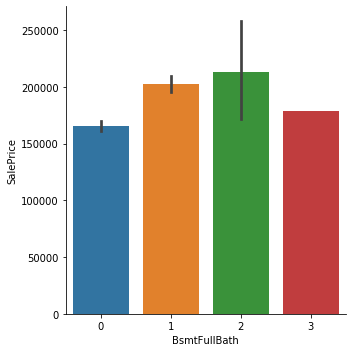

In [32]:
# Bar plots
cols = ['Exterior1st', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'BsmtFullBath']
for col in cols:
    g = sns.catplot(x=col, y="SalePrice", kind="bar", data=viz)
    plt.show()

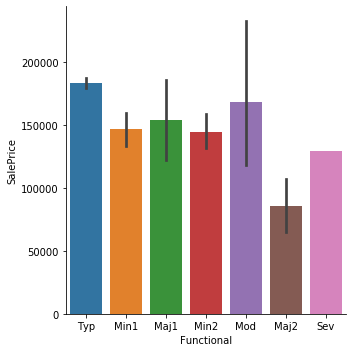

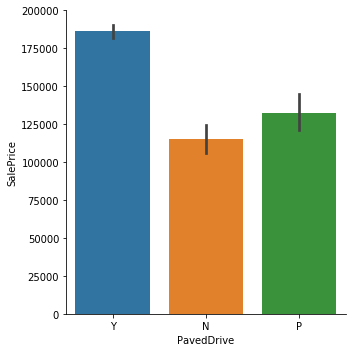

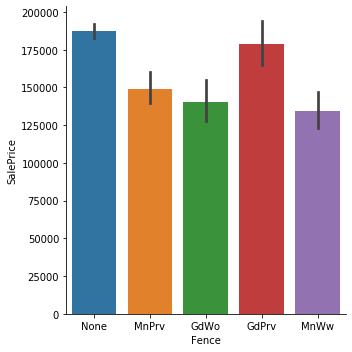

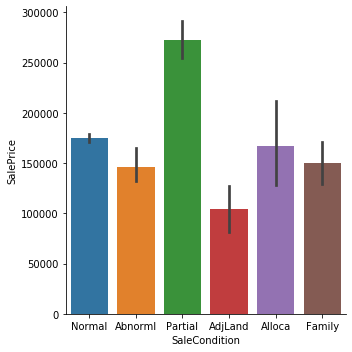

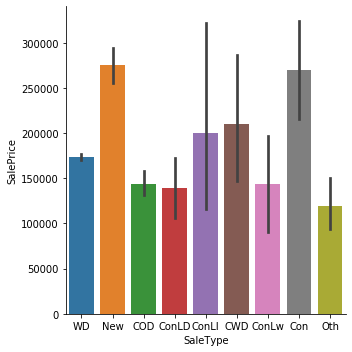

In [33]:
# Bar plots
cols = ['Functional', 'PavedDrive', 'Fence', 'SaleCondition', 'SaleType']
for col in cols:
    g = sns.catplot(x=col, y="SalePrice", kind="bar", data=viz)
    plt.show()

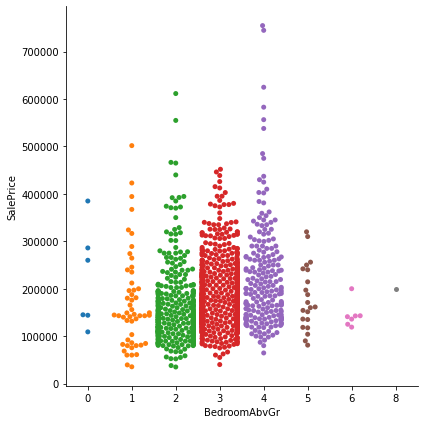

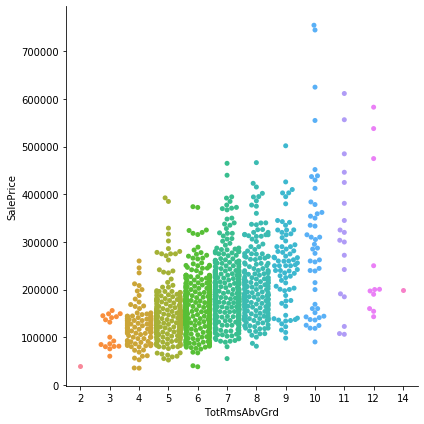

In [96]:
cols = ['BedroomAbvGr', 'TotRmsAbvGrd']

for col in cols:
    g = sns.catplot(kind="swarm", x=col, y="SalePrice", data=viz, height=6, aspect=1)
    if col == 'Neighborhood':
        g.set_xticklabels(rotation=45)
    else:
        pass
    plt.show()

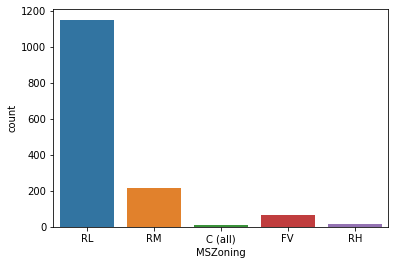

In [97]:
# Count plots
cols = ['MSZoning']
for col in cols:
    ax = sns.countplot(data=viz, x=col)
    plt.show()